In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

In [5]:
stud = pd.read_csv('stud_math.csv')

display(stud.sample(10))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
343,GP,F,17,U,GT3,A,2.0,2.0,at_home,at_home,home,father,1.0,2.0,1.0,no,yes,no,no,yes,-6.0,yes,yes,yes,3.0,3.0,1.0,4.0,0.0,0.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
68,GP,F,15,R,LE3,T,2.0,2.0,health,NaN,reputation,mother,NaN,2.0,NaN,yes,yes,NaN,no,yes,-6.0,yes,yes,no,4.0,1.0,3.0,4.0,2.0,40.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
194,GP,M,16,U,GT3,T,2.0,3.0,other,other,home,father,2.0,1.0,0.0,no,no,no,no,yes,-3.0,yes,NaN,NaN,5.0,3.0,3.0,3.0,0.0,70.0
164,GP,M,17,R,LE3,T,1.0,1.0,other,services,course,NaN,4.0,2.0,3.0,no,no,NaN,yes,yes,-6.0,no,no,yes,5.0,3.0,5.0,NaN,0.0,35.0
301,GP,M,17,U,LE3,T,4.0,4.0,other,teacher,home,father,2.0,1.0,0.0,no,no,yes,no,yes,-3.0,yes,yes,no,4.0,1.0,1.0,5.0,0.0,50.0
335,GP,F,17,U,GT3,T,3.0,4.0,services,other,NaN,mother,1.0,3.0,0.0,no,NaN,no,no,yes,-9.0,yes,yes,no,4.0,4.0,5.0,5.0,16.0,75.0
78,GP,M,17,U,NaN,T,2.0,1.0,other,other,home,mother,2.0,1.0,3.0,yes,NaN,no,yes,yes,-3.0,no,yes,no,4.0,5.0,1.0,3.0,2.0,50.0


In [6]:
stud.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [7]:
# columns renaming

stud.columns = ['school', 'sex', 'age', 'address', 'famsize', 'pstatus',
                'm_edu', 'f_edu', 'm_job', 'f_job', 'reason', 'guardian',
                'traveltime', 'studytime', 'failures', 'schoolsup',
                'famsup', 'paid', 'activities', 'nursery',
                'studytime_granular', 'higher', 'internet', 'romantic',
                'famrel', 'freetime', 'goout', 'health', 'absences',
                'score']

stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              395 non-null    object 
 1   sex                 395 non-null    object 
 2   age                 395 non-null    int64  
 3   address             378 non-null    object 
 4   famsize             368 non-null    object 
 5   pstatus             350 non-null    object 
 6   m_edu               392 non-null    float64
 7   f_edu               371 non-null    float64
 8   m_job               376 non-null    object 
 9   f_job               359 non-null    object 
 10  reason              378 non-null    object 
 11  guardian            364 non-null    object 
 12  traveltime          367 non-null    float64
 13  studytime           388 non-null    float64
 14  failures            373 non-null    float64
 15  schoolsup           386 non-null    object 
 16  famsup  

In [11]:
stud1 = stud.copy()

In [92]:
# Let's look at columns separately and rename values patterns 
# to understand them clearly.

# Then check numeric series and cut outliers if it makes sense.

In [93]:
def Q1(column):
    return column.quantile(q=0.25, interpolation='midpoint')


def Q3(column):
    return column.quantile(q=0.75, interpolation='midpoint')


def IQR(column):
    return Q3(column) - Q1(column)

def low_outl(column):
    return Q1(column) - 1.5*IQR(column)

def high_outl(column):
    return Q3(column) + 1.5*IQR(column)

## school

In [16]:
stud1.school.value_counts()

GP    349
MS     46
Name: school, dtype: int64

## sex

In [25]:
stud1.sex.value_counts()

F    208
M    187
Name: sex, dtype: int64

In [27]:
stud1.sex = stud1.sex.apply(lambda x: 'male' if x == 'M' else
                            'female' if x == 'F' else x)
stud1.sex.unique()

array(['female', 'male'], dtype=object)

## age

In [18]:
stud1.age.value_counts()

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

OUTLIERS:


,school,sex,age,address,famsize,pstatus,m_edu,f_edu,m_job,f_job,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
247,GP,male,22,urban,greater_3,together,3.0,1.0,services,services,other,mother,1.0,1.0,3.0,no,no,no,no,no,-3.0,no,yes,yes,5.0,4.0,5.0,1.0,16.0,40.0


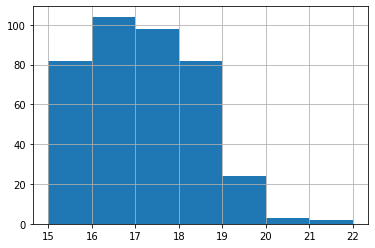

In [127]:
display(stud1.age.describe())
stud1.age.hist(bins=7)

print('OUTLIERS:')
display(stud1[(stud1.age < low_outl(stud1.age)) | 
              (stud1.age > high_outl(stud1.age))])

In [125]:
# Despite 22 is outlier we won't cut it because this value is logically
# possible.

## address

In [19]:
stud1.address.value_counts()

U    295
R     83
Name: address, dtype: int64

In [28]:
stud1.address = stud1.address.apply(lambda x: 'urban' if x == 'U' else
                                    'region' if x == 'R' else x)
stud1.address.unique()

array(['urban', nan, 'region'], dtype=object)

## famsize

In [24]:
stud1.famsize.value_counts()

GT3    261
LE3    107
Name: famsize, dtype: int64

In [29]:
stud1.famsize = stud1.famsize.apply(
    lambda x: 'less_equal_3' if x == 'LE3' else
    'greater_3' if x == 'GT3' else x)
stud1.famsize.unique()

array([nan, 'greater_3', 'less_equal_3'], dtype=object)

## pstatus

In [30]:
stud1.pstatus.value_counts()

T    314
A     36
Name: pstatus, dtype: int64

In [31]:
stud1.pstatus = stud1.pstatus.apply(lambda x: 'together' if x == 'T'
                                    else 'apart' if x == 'A' else x)
stud1.pstatus.unique()

array(['apart', nan, 'together'], dtype=object)

## m_edu

In [32]:
stud1.m_edu.value_counts()

4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: m_edu, dtype: int64

count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: m_edu, dtype: float64

OUTLIERS:


,school,sex,age,address,famsize,pstatus,m_edu,f_edu,m_job,f_job,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score


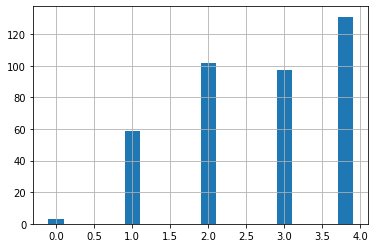

In [156]:
display(stud1.m_edu.describe())

stud1.m_edu.hist(bins=20, align='left')#.set_xlim(0,5)
print('OUTLIERS:')
display(stud1[(stud1.m_edu < low_outl(stud1.m_edu)) | 
              (stud1.m_edu > high_outl(stud1.m_edu))])

In [150]:
# There is no outliers.

## f_edu

In [151]:
stud1.f_edu.value_counts()

2.0    106
3.0     96
4.0     89
1.0     78
0.0      2
Name: f_edu, dtype: int64

In [36]:
# Value 40 is impossible. It must be misprint.
stud1.f_edu = stud1.f_edu.apply(lambda x: 4. if x == 40. else x)
stud1.f_edu.value_counts()

2.0    106
3.0     96
4.0     89
1.0     78
0.0      2
Name: f_edu, dtype: int64

count    371.000000
mean       2.517520
std        1.088808
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: f_edu, dtype: float64

OUTLIERS:


,school,sex,age,address,famsize,pstatus,m_edu,f_edu,m_job,f_job,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
76,GP,male,15,urban,NaN,together,4.0,0.0,teacher,other,course,mother,2.0,4.0,0.0,no,no,no,yes,yes,-12.0,NaN,yes,no,3.0,4.0,3.0,1.0,8.0,50.0
171,GP,male,16,urban,greater_3,together,1.0,0.0,other,other,reputation,mother,2.0,2.0,NaN,no,yes,yes,yes,yes,-6.0,NaN,yes,yes,4.0,3.0,2.0,3.0,2.0,80.0


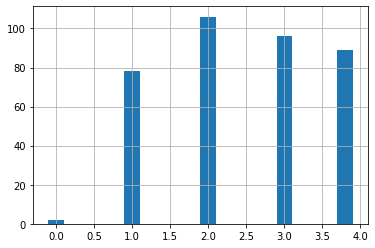

In [157]:
display(stud1.f_edu.describe())

stud1.f_edu.hist(bins=20, align='left')#.set_xlim(0,5)
print('OUTLIERS:')
display(stud1[(stud1.f_edu < low_outl(stud1.f_edu)) | 
              (stud1.f_edu > high_outl(stud1.f_edu))])

In [158]:
# Despite 0 is outlier we won't cut it because this value is logically
# possible (no education).

## m_job

In [37]:
stud1.m_job.value_counts()

other       133
services     98
at_home      58
teacher      55
health       32
Name: m_job, dtype: int64

## f_job

In [38]:
stud1.f_job.value_counts()

other       197
services    102
teacher      29
at_home      16
health       15
Name: f_job, dtype: int64

## reason

In [39]:
stud1.reason.value_counts()

course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64

## guardian

In [40]:
stud1.guardian.value_counts()

mother    250
father     86
other      28
Name: guardian, dtype: int64

## traveltime

In [41]:
stud1.traveltime.value_counts()

1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

OUTLIERS:


,school,sex,age,address,famsize,pstatus,m_edu,f_edu,m_job,f_job,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
61,GP,female,16,urban,greater_3,together,1.0,1.0,services,services,course,father,4.0,1.0,0.0,yes,NaN,no,yes,no,-3.0,yes,yes,yes,5.0,5.0,5.0,5.0,6.0,55.0
108,GP,male,15,region,greater_3,NaN,4.0,4.0,other,other,home,father,4.0,4.0,NaN,no,yes,yes,yes,yes,-12.0,yes,yes,yes,1.0,3.0,5.0,1.0,6.0,65.0
149,GP,male,15,urban,less_equal_3,NaN,2.0,1.0,services,other,course,mother,4.0,1.0,3.0,no,NaN,no,no,yes,-3.0,NaN,yes,no,4.0,5.0,5.0,5.0,0.0,50.0
164,GP,male,17,region,less_equal_3,together,1.0,1.0,other,services,course,NaN,4.0,2.0,3.0,no,no,NaN,yes,yes,-6.0,no,no,yes,5.0,3.0,5.0,NaN,0.0,35.0
228,GP,male,18,urban,NaN,together,2.0,1.0,at_home,other,course,mother,4.0,2.0,0.0,yes,yes,yes,yes,yes,-6.0,yes,yes,yes,4.0,3.0,2.0,3.0,14.0,45.0
327,GP,male,17,region,greater_3,together,2.0,2.0,services,other,course,mother,4.0,1.0,0.0,no,NaN,no,no,yes,-3.0,yes,yes,no,4.0,4.0,5.0,4.0,8.0,50.0
375,MS,female,18,region,greater_3,together,1.0,1.0,other,other,home,mother,4.0,3.0,0.0,no,no,no,no,yes,-9.0,yes,yes,no,4.0,3.0,2.0,4.0,2.0,50.0


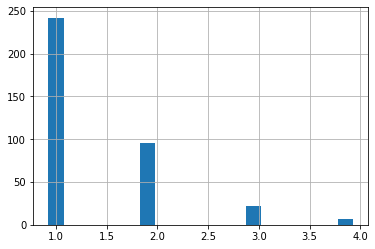

In [162]:
display(stud1.traveltime.describe())

stud1.traveltime.hist(bins=20, align='left')#.set_xlim(0,5)
print('OUTLIERS:')
display(stud1[(stud1.traveltime < low_outl(stud1.traveltime)) | 
              (stud1.traveltime > high_outl(stud1.traveltime))])

In [163]:
# Despite 4 is outlier we won't cut it because this value is logically
# possible (7 students leave so far from school).

## studytime

In [164]:
stud1.studytime.value_counts()

2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

OUTLIERS:
Values less than -0.5 or bigger than 3.5


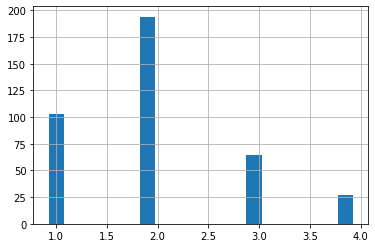

In [187]:
display(stud1.studytime.describe())

stud1.studytime.hist(bins=20, align='left')#.set_xlim(0,5)
print(f'OUTLIERS:\nValues less than {low_outl(stud1.studytime)} \
or bigger than {high_outl(stud1.studytime)}')

In [ ]:
# Despite 4 is outlier we won't cut it because this value is logically
# possible (27 students study hard beyond the school).

## failures

In [43]:
stud1.failures.value_counts()

0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

OUTLIERS:
Values less than 0.0 or bigger than 0.0


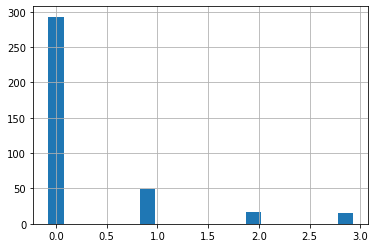

In [223]:
display(stud1.failures.describe())

stud1.failures.hist(bins=20, align='left')#.set_xlim(0,5)
print(f'OUTLIERS:\nValues less than {low_outl(stud1.failures)} \
or bigger than {high_outl(stud1.failures)}')

In [189]:
# Most students never have had failures, but some have. Keep them.

## schoolsup

In [44]:
stud1.schoolsup.value_counts()

no     335
yes     51
Name: schoolsup, dtype: int64

## famsup

In [45]:
stud1.famsup.value_counts()

yes    219
no     137
Name: famsup, dtype: int64

## paid

In [46]:
stud1.paid.value_counts()

no     200
yes    155
Name: paid, dtype: int64

## activities

In [47]:
stud1.activities.value_counts()

yes    195
no     186
Name: activities, dtype: int64

## nursery

In [48]:
stud1.nursery.value_counts()

yes    300
no      79
Name: nursery, dtype: int64

## studytime_granular

In [49]:
stud1.studytime_granular.value_counts()

-6.0     194
-3.0     103
-9.0      64
-12.0     27
Name: studytime_granular, dtype: int64

In [206]:
# Nobody knows what "studytime, granular" means... So remove it.

stud1.drop(['studytime_granular'], inplace = True, axis = 1)

## higher

In [208]:
stud1.higher.value_counts()

yes    356
no      19
Name: higher, dtype: int64

## internet

In [209]:
stud1.internet.value_counts()

yes    305
no      56
Name: internet, dtype: int64

## romantic

In [52]:
stud1.romantic.value_counts()

no     240
yes    124
Name: romantic, dtype: int64

## famrel

In [212]:
stud1.famrel.value_counts()

 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

In [213]:
# Value -1 is impossible. It must be misprint.
stud1.famrel = stud1.famrel.apply(lambda x: 1. if x == -1. else x)
stud1.famrel.unique()

array([ 4.,  5.,  3., nan,  1.,  2.])

count    368.000000
mean       3.942935
std        0.903824
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

OUTLIERS:
Values less than 2.5 or bigger than 6.5


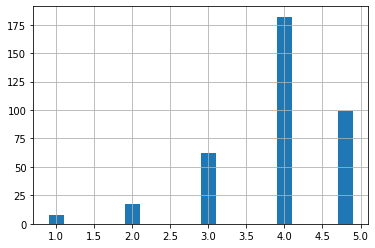

In [225]:
display(stud1.famrel.describe())

stud1.famrel.hist(bins=20, align='left')#.set_xlim(0,5)
print(f'OUTLIERS:\nValues less than {low_outl(stud1.famrel)} \
or bigger than {high_outl(stud1.famrel)}')

In [ ]:
# We've got 17 outliers with famrel=2 and 8 outliers with famrel=1.
# But the plot looks close to normal distribution, without abnormal
# peaks or gaps. 
# So keep all values.

## freetime

In [219]:
stud1.freetime.value_counts()

3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64

count    384.000000
mean       3.231771
std        0.993940
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

OUTLIERS:
Values less than 1.5 or bigger than 5.5


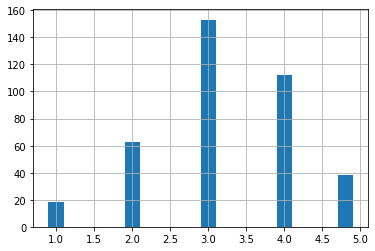

In [220]:
display(stud1.freetime.describe())

stud1.freetime.hist(bins=20, align='left')#.set_xlim(0,5)
print(f'OUTLIERS:\nValues less than {low_outl(stud1.freetime)} \
or bigger than {high_outl(stud1.freetime)}')

In [226]:
# Keep all

## goout

In [56]:
stud1.goout.value_counts()

3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64

count    387.000000
mean       3.105943
std        1.115896
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

OUTLIERS:
Values less than -1.0 or bigger than 7.0


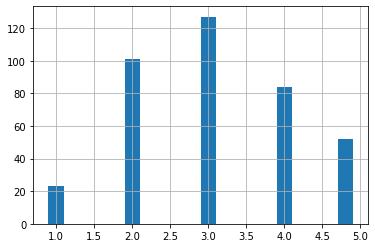

In [227]:
display(stud1.goout.describe())

stud1.goout.hist(bins=20, align='left')#.set_xlim(0,5)
print(f'OUTLIERS:\nValues less than {low_outl(stud1.goout)} \
or bigger than {high_outl(stud1.goout)}')

In [228]:
# No outliers.

## health

In [229]:
stud1.health.value_counts()

5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64

count    380.000000
mean       3.531579
std        1.396019
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

OUTLIERS:
Values less than 0.0 or bigger than 8.0


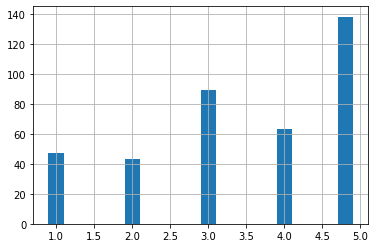

In [230]:
display(stud1.health.describe())

stud1.health.hist(bins=20, align='left')#.set_xlim(0,5)
print(f'OUTLIERS:\nValues less than {low_outl(stud1.health)} \
or bigger than {high_outl(stud1.health)}')

In [231]:
# No outliers.

## absences

In [58]:
stud1.absences.value_counts()

0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
14.0      12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

OUTLIERS:
Values less than -12.0 or bigger than 20.0


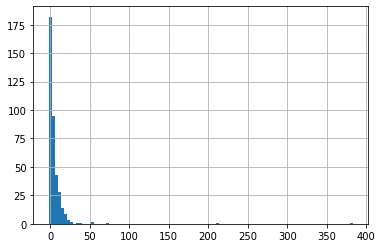

In [242]:
display(stud1.absences.describe())

stud1.absences.hist(bins=100, align='left')#.set_xlim(0,5)
print(f'OUTLIERS:\nValues less than {low_outl(stud1.absences)} \
or bigger than {high_outl(stud1.absences)}')

In [234]:
# It's more important the student is working hard or not rather than 
# they've missed 50 or 385(!) lessons.
# So it's reasonable to remove outliers.

stud2 = stud1.loc[stud1.absences <= 20.]

count    366.000000
mean       4.603825
std        4.965512
min        0.000000
25%        0.000000
50%        4.000000
75%        7.000000
max       20.000000
Name: absences, dtype: float64

OUTLIERS:
Values less than -10.5 or bigger than 17.5


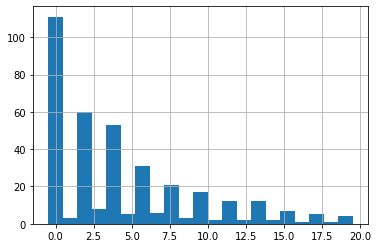

In [238]:
display(stud2.absences.describe())

stud2.absences.hist(bins=21, align='left')#.set_xlim(0,5)
print(f'OUTLIERS:\nValues less than {low_outl(stud2.absences)} \
or bigger than {high_outl(stud2.absences)}')

## score

In [248]:
stud2.score.value_counts()

50.0     53
55.0     42
0.0      36
75.0     31
65.0     30
60.0     29
70.0     27
40.0     26
45.0     23
80.0     16
30.0     14
35.0      9
90.0      9
25.0      7
95.0      5
85.0      3
100.0     1
Name: score, dtype: int64

count    361.000000
mean      51.994460
std       22.956117
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

OUTLIERS:
Values less than -5.0 or bigger than 115.0


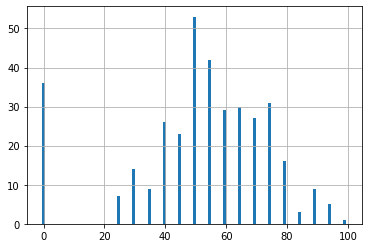

In [251]:
display(stud2.score.describe())

stud2.score.hist(bins=101, align='left')#.set_ylim(0,10)
print(f'OUTLIERS:\nValues less than {low_outl(stud2.score)} \
or bigger than {high_outl(stud2.score)}')

In [279]:
# Despite median value is close to mean value and low border of outliers
# is -5, it looks quite strange than there is no values between 0 and 25.
# So we can remove all zero values as outliers.

stud3 = stud2.loc[stud2.score != 0]

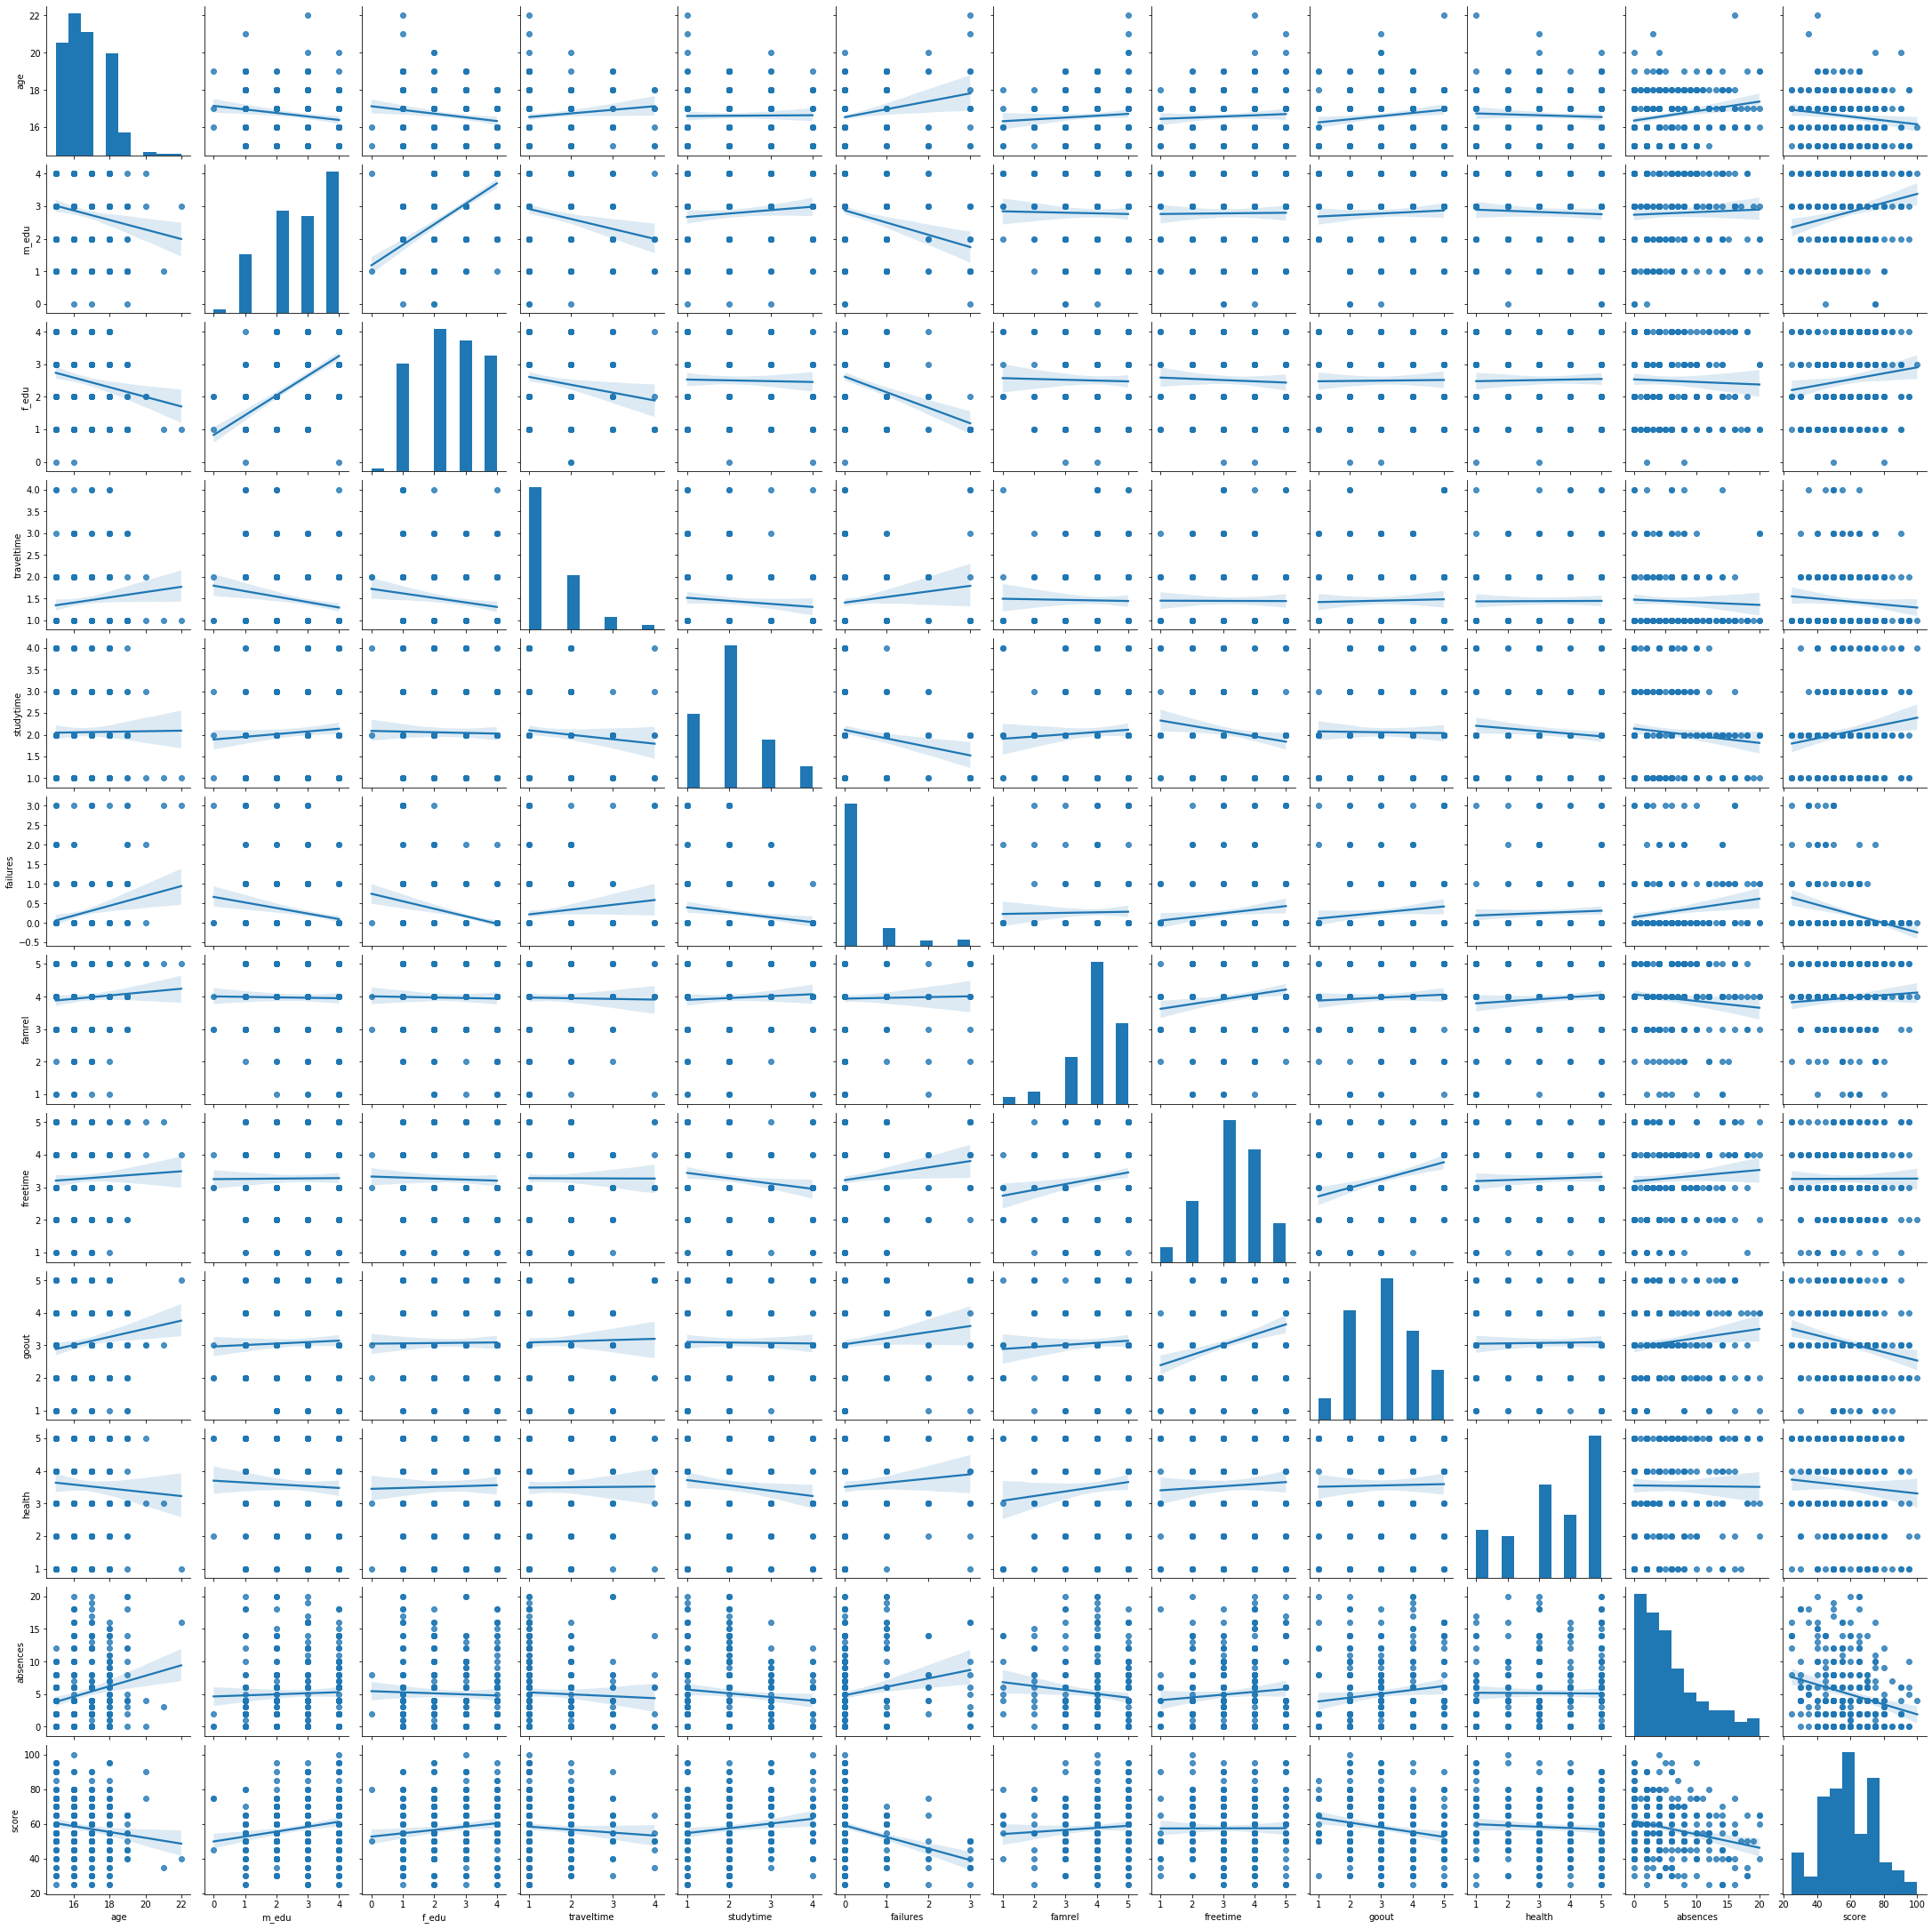

In [291]:
# Numeric values regression esteem

sns.pairplot(stud3, kind = 'reg')

In [307]:
stud3.corr()

,age,m_edu,f_edu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.166192,-0.170968,0.108277,0.009568,0.231529,0.071405,0.051364,0.145265,-0.053369,0.202238,-0.131938
m_edu,-0.166192,1.000000,0.617259,-0.196215,0.080418,-0.231143,-0.017091,0.008658,0.045439,-0.044292,0.036171,0.197099
f_edu,-0.170968,0.617259,1.000000,-0.158286,-0.019643,-0.301857,-0.020735,-0.034691,0.009980,0.021965,-0.036099,0.133777
traveltime,0.108277,-0.196215,-0.158286,1.000000,-0.084931,0.125212,-0.016473,-0.003082,0.024360,0.005512,-0.042584,-0.077030
studytime,0.009568,0.080418,-0.019643,-0.084931,1.000000,-0.157329,0.054622,-0.140778,-0.012218,-0.099660,-0.097409,0.147275
failures,0.231529,-0.231143,-0.301857,0.125212,-0.157329,1.000000,0.018350,0.134513,0.119868,0.062950,0.174580,-0.280834
famrel,0.071405,-0.017091,-0.020735,-0.016473,0.054622,0.018350,1.000000,0.162585,0.053228,0.095068,-0.110557,0.068445
freetime,0.051364,0.008658,-0.034691,-0.003082,-0.140778,0.134513,0.162585,1.000000,0.285986,0.044887,0.086600,0.002375
goout,0.145265,0.045439,0.009980,0.024360,-0.012218,0.119868,0.053228,0.285986,1.000000,0.015379,0.128691,-0.188648
health,-0.053369,-0.044292,0.021965,0.005512,-0.099660,0.062950,0.095068,0.044887,0.015379,1.000000,-0.008305,-0.064667


In [537]:
stud3.corr().loc['score']

age          -0.131938
m_edu         0.197099
f_edu         0.133777
traveltime   -0.077030
studytime     0.147275
failures     -0.280834
famrel        0.068445
freetime      0.002375
goout        -0.188648
health       -0.064667
absences     -0.242220
score         1.000000
Name: score, dtype: float64

*Ни один из численных параметров не оказывает критического влияния на успеваемость по математике. 
Но все же можно отметить, что шансы на высокую оценку тем выше, чем:*
  * меньше возраст студента,
  * выше уровень образования его родителей,
  * больше времени он занимается математикой дома,
  * ближе он живет к школе,
  * более он собран и уверен в себе (меньше разного рода провалов и огорчений),
  * меньше он гуляет с друзьями (вместо того, чтобы делать уроки),
  * меньше он прогуливает уроков.
  
*Возможно, студент будет лучше учиться, если у него хорошие отношения в семье и он слегка нездоров (опять же больше времени сидит дома с учебниками), но это неочевидный факт.*

In [331]:
# Look at values which influence on score is less than 0.1:

studcor = stud3.corr()
studcor[['traveltime','famrel','freetime','health']]

,traveltime,famrel,freetime,health
age,0.108277,0.071405,0.051364,-0.053369
m_edu,-0.196215,-0.017091,0.008658,-0.044292
f_edu,-0.158286,-0.020735,-0.034691,0.021965
traveltime,1.000000,-0.016473,-0.003082,0.005512
studytime,-0.084931,0.054622,-0.140778,-0.099660
failures,0.125212,0.018350,0.134513,0.062950
famrel,-0.016473,1.000000,0.162585,0.095068
freetime,-0.003082,0.162585,1.000000,0.044887
goout,0.024360,0.053228,0.285986,0.015379
health,0.005512,0.095068,0.044887,1.000000


### Correlation between 'freetime' and 'goout' is not so big (0.29) but we can exclude 'freetime' concerning it's low influence on 'score' (0.002). 

In [337]:
stud4 = stud3.copy()

stud4.drop(['freetime'], inplace=True, axis=1)

## Object (nominative) values

In [364]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(7, 4))
    sns.boxplot(x=column, y='score',
                data=stud4)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

    
# boxplots with separate gender

def get_boxplotg(column):
    fig, ax = plt.subplots(figsize=(7, 4))
    sns.boxplot(x=column, y='score',
                data=stud4, hue='sex')
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

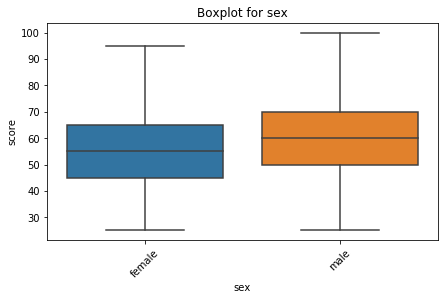

In [370]:
get_boxplot('sex')

*Юноши более склонны к точным наукам. Чуть-чуть...*

#### *Добавим немного юмора и оценим влияние номинативных признаков на оценку раздельно для юношей и девушек.*

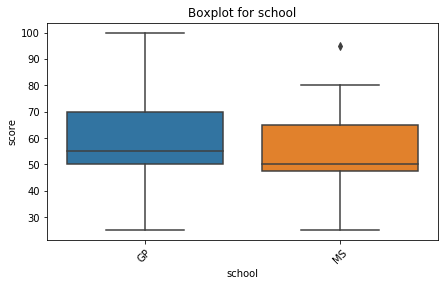

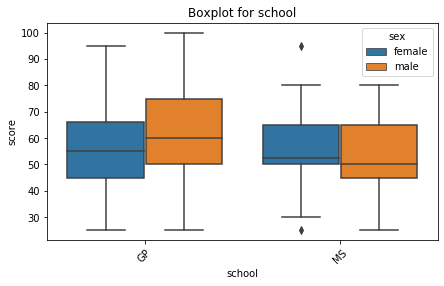

In [366]:
get_boxplot('school')
get_boxplotg('school')

*В школе GP по сравнению со школой MS:*
  * медианная оценка, 1-й и 3-й кваритили (а также максимальный балл) на экзамене немного выше,
  * разброс оценок выше,
  * юноши в среднем сдают математику лучше девушек.

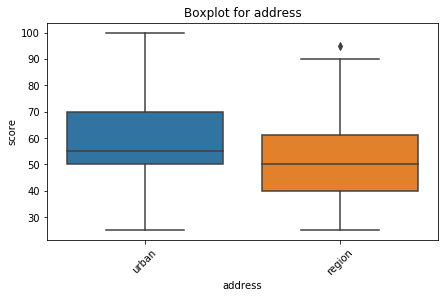

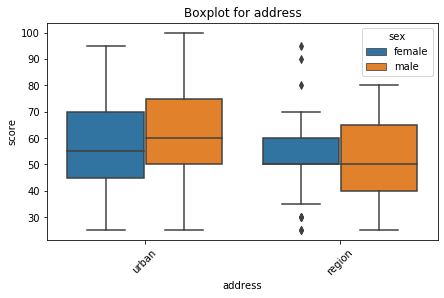

In [367]:
get_boxplot('address')
get_boxplotg('address')

*Городские жители, что ожидаемо, сдают экзамен немного лучше деревенских, при этом городские юноши немного опережают городских же девушек, а деревенские девушки показывают высокую "кучность" результатов (маленький IQR), но среди них встречаются девушки с очень высоким баллом (выбросы значений). Деревенские парни больше 80 баллов на экзамене прыгнуть не могут...*

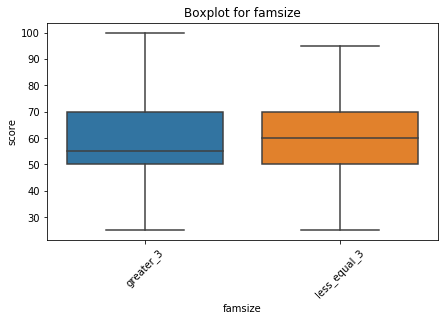

In [369]:
get_boxplot('famsize')

*Несмотря на то, что медианное значение отличается (в пользу маленьких семей), разброс данных в маленьких семьях и больших очень похож, поэтому данным фактором влияния на оценку **можно пренебречь**.*

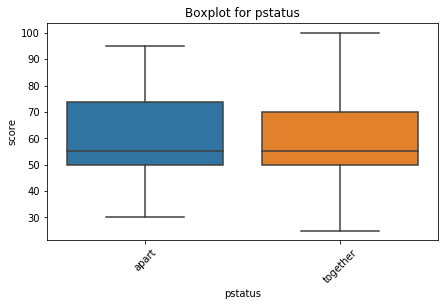

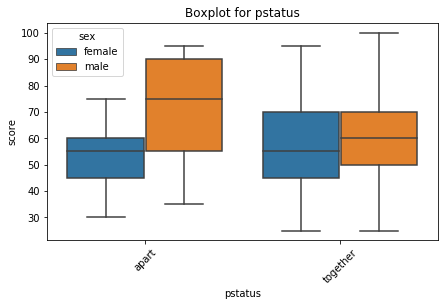

In [371]:
get_boxplot('pstatus')
get_boxplotg('pstatus')

*На первый взгляд, статус проживания родителей (раздельное или совместное) **не оказывает большого влияния** на оценку по математике. Но при дальнейшем рассмотрении оказывается, что раздельное проживание родителей способствует высокой успеваемости юношей. Может, взрослеют быстрее?*

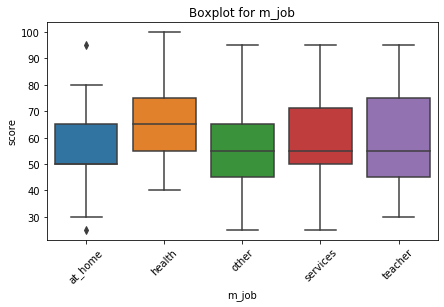

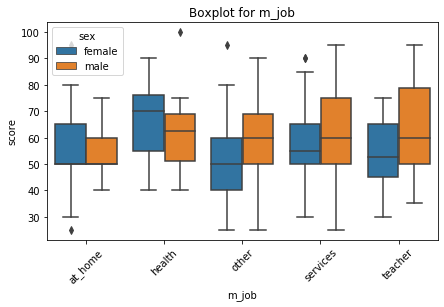

In [372]:
get_boxplot('m_job')
get_boxplotg('m_job')

*Неудивительно, что самые высокие оценки (медианные) у детей в семьях, где отец врач. Но главное не это, а то, что девочки в таких семьях утирают мальчикам нос по математике.*

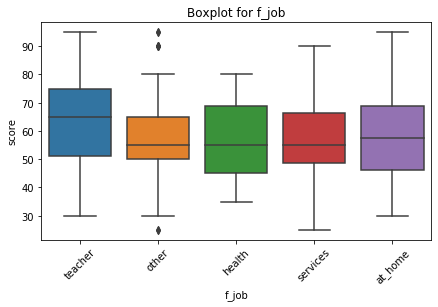

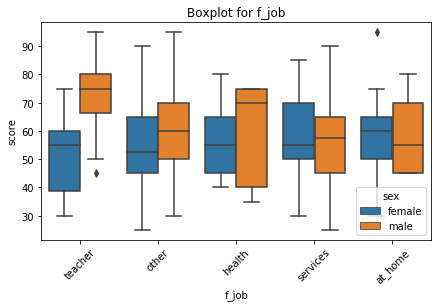

In [373]:
get_boxplot('f_job')
get_boxplotg('f_job')

*Лучшая (с точки зрения высокой оценки по математике) профессия для мамы - это учитель. И именно в этих семьях юноши показывают максимальные результаты на экзамене. Для девушек же в среднем лучше, если мама сидит дома...*

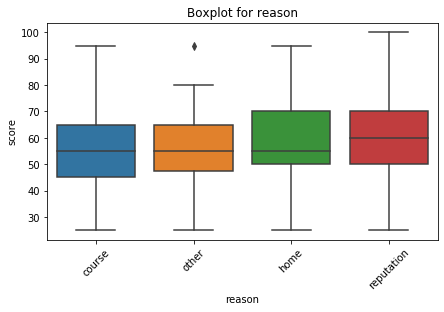

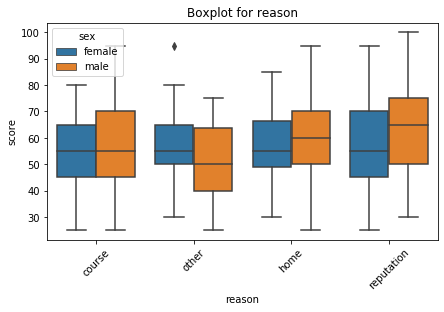

In [374]:
get_boxplot('reason')
get_boxplotg('reason')

*Девушкам, наверно, не так важно, по какому принципу выбирать школу...
А вот тяготеющие к математике юноши выбирают школу по ее репутации. Ну или, на худой случай, поближе к дому.*
*В целом данным параметром, скорее всего, следует **пренебречь**.*

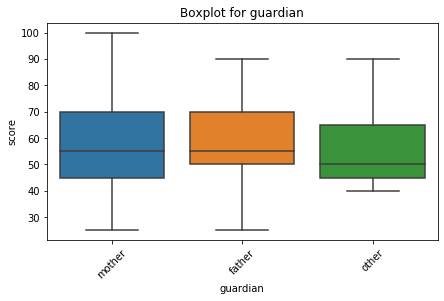

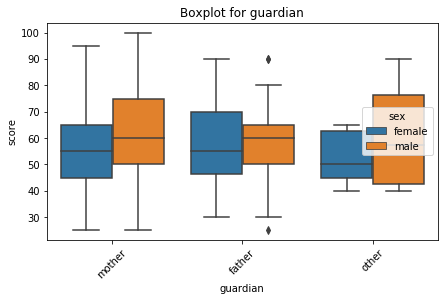

In [383]:
get_boxplot('guardian')
get_boxplotg('guardian')

*Конечно, для ребенка всегда лучше, когда его воспитывает папа и/или мама. Но, исходя из характера распределения на графике, параметром 'guardian' **можно пренебречь**.*

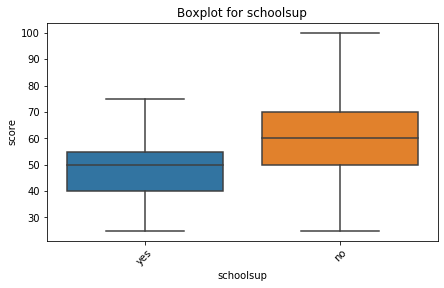

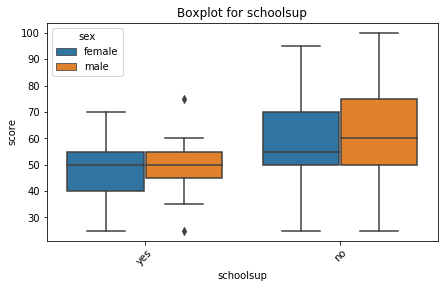

In [382]:
get_boxplot('schoolsup')
get_boxplotg('schoolsup')

*Дополнительная образовательная поддержка (что бы это значило?) оказывает только отрицательное воздействие на успеваемость.*

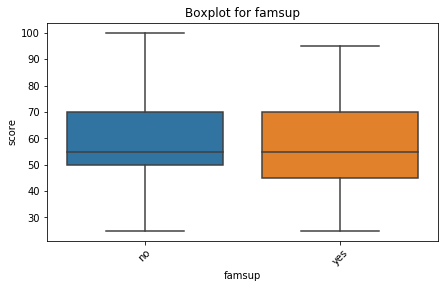

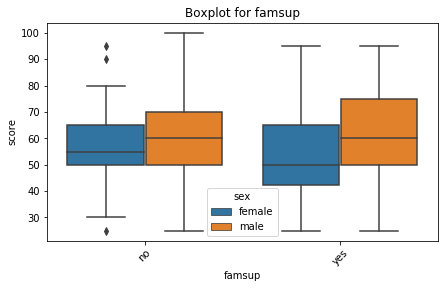

In [385]:
get_boxplot('famsup')
get_boxplotg('famsup')

*Данным фактором **можно пренебречь**.*

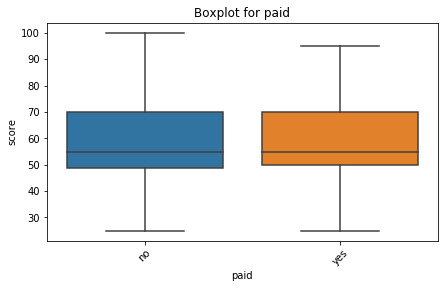

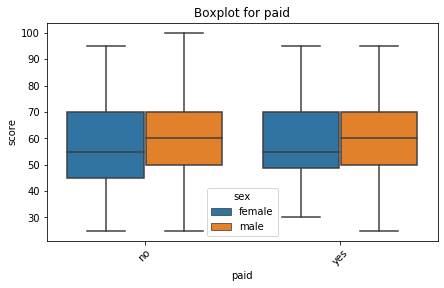

In [386]:
get_boxplot('paid')
get_boxplotg('paid')

*Нанимай репетитора по математике или не нанимай - результат один. 
**Можно убрать из рассмотрения**.*

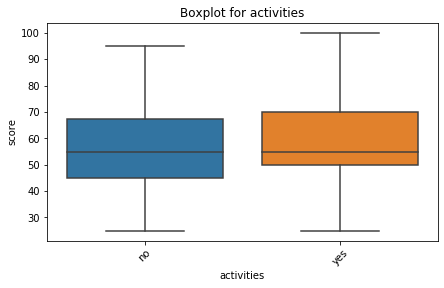

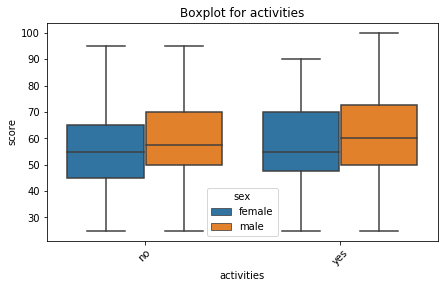

In [387]:
get_boxplot('activities')
get_boxplotg('activities')

*То же самое: **фактор незначимый**.*

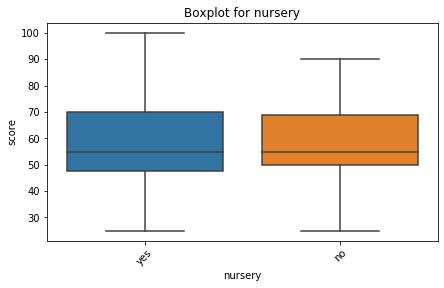

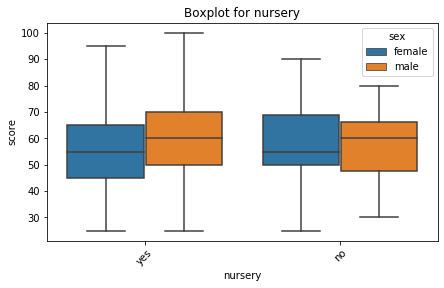

In [388]:
get_boxplot('nursery')
get_boxplotg('nursery')

*Та же история: посещение детского сада **не повлияло** на результаты экзамена.*

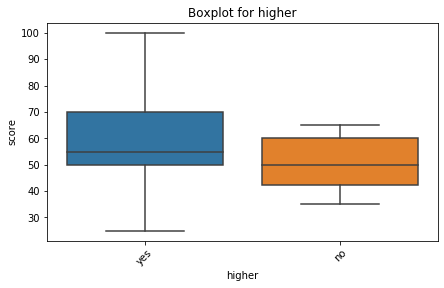

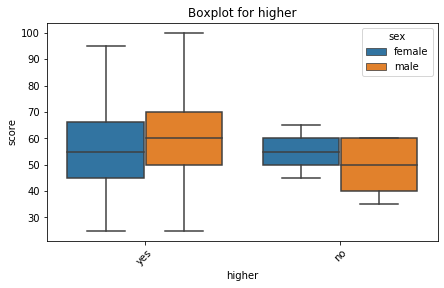

In [389]:
get_boxplot('higher')
get_boxplotg('higher')

*Желание поступить в вуз мало влияет на оценку по математике у девушек, но заметно влияет на успеваемость у юношей. Либо юноши больше верят в будущую пользу математики, либо чаще выбирают для себя профессии, связанные с математикой.*

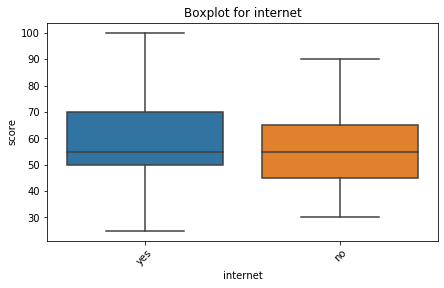

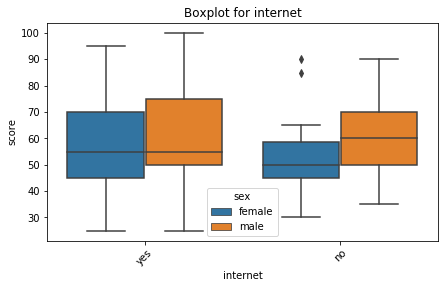

In [391]:
get_boxplot('internet')
get_boxplotg('internet')

*Наличие интернета **не влияет** на медианное значение оценки для всей выборки. Но если взглянуть раздельно: девушкам интернет помогает учиться, а вот юношам - наоборот.*

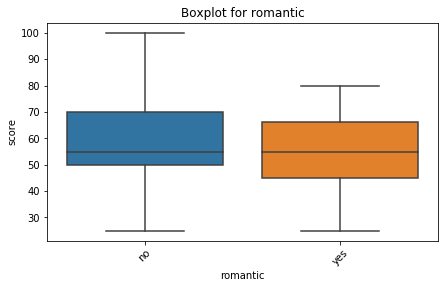

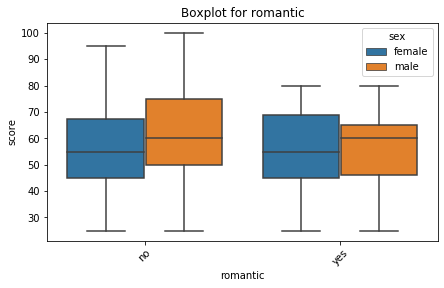

In [392]:
get_boxplot('romantic')
get_boxplotg('romantic')

*Похожая картина. Кажется, что романтика **не влияет** на школьников в целом. Но, что у юношей, что у девушек, максимальные баллы берут только те студенты, кто "не отвлекается на пустяки".*

In [539]:
# Let's check for NaN values

stud_noNaN = stud4.dropna()#(inplace = True)
stud_noNaN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 4 to 391
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      89 non-null     object 
 1   sex         89 non-null     object 
 2   age         89 non-null     int64  
 3   address     89 non-null     object 
 4   famsize     89 non-null     object 
 5   pstatus     89 non-null     object 
 6   m_edu       89 non-null     float64
 7   f_edu       89 non-null     float64
 8   m_job       89 non-null     object 
 9   f_job       89 non-null     object 
 10  reason      89 non-null     object 
 11  guardian    89 non-null     object 
 12  traveltime  89 non-null     float64
 13  studytime   89 non-null     float64
 14  failures    89 non-null     float64
 15  schoolsup   89 non-null     object 
 16  famsup      89 non-null     object 
 17  paid        89 non-null     object 
 18  activities  89 non-null     object 
 19  nursery     89 non-null     ob

Только 89 строк (менее 30 %) не содержат пустых ячеек. Удаление 70 % информации может привести к существенному нарушению причинно-следственных связей, что подтверждается корреляционной матрицей: 

In [540]:
display(stud4.corr().loc['score'])
display(stud_noNaN.corr().loc['score'])

age          -0.131938
m_edu         0.197099
f_edu         0.133777
traveltime   -0.077030
studytime     0.147275
failures     -0.280834
famrel        0.068445
goout        -0.188648
health       -0.064667
absences     -0.242220
score         1.000000
Name: score, dtype: float64

age          -0.143100
m_edu         0.045485
f_edu         0.059128
traveltime   -0.128019
studytime     0.155376
failures     -0.327808
famrel       -0.036514
goout        -0.109064
health       -0.125595
absences     -0.143598
score         1.000000
Name: score, dtype: float64

Попробуем сохранить большее количество строк для анализа.

Для этого **удалим** факторы, которые *не оказывают заметного влияния* на оценку по данным первичного анализа (корреляционная матрица и графический анализ соответственно для числовых и номинативных параметров).

Числовые:
  - traveltime,
  - famrel,
  - health.
  
Номинативные:
  - famsize,
  - pstatus,
  - reason,
  - guardian,
  - famsup,
  - paid,
  - activities,
  - nursery,
  - internet,
  - romantic.

**Уберем** из этих датафреймов *строки с пустыми (NaN)* ячеками и посмотрим, что получится.

In [608]:
stud5 = stud4.copy()
stud5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330 entries, 0 to 394
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      330 non-null    object 
 1   sex         330 non-null    object 
 2   age         330 non-null    int64  
 3   address     316 non-null    object 
 4   famsize     311 non-null    object 
 5   pstatus     296 non-null    object 
 6   m_edu       328 non-null    float64
 7   f_edu       310 non-null    float64
 8   m_job       316 non-null    object 
 9   f_job       300 non-null    object 
 10  reason      315 non-null    object 
 11  guardian    302 non-null    object 
 12  traveltime  307 non-null    float64
 13  studytime   325 non-null    float64
 14  failures    313 non-null    float64
 15  schoolsup   321 non-null    object 
 16  famsup      297 non-null    object 
 17  paid        295 non-null    object 
 18  activities  318 non-null    object 
 19  nursery     317 non-null    o

In [609]:
stud5.drop(['traveltime', 'famrel', 'health', 'famsize', 'pstatus',
            'reason', 'guardian', 'famsup', 'paid', 'activities',
           'nursery', 'internet', 'romantic'], inplace=True, axis=1)
stud5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330 entries, 0 to 394
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   school     330 non-null    object 
 1   sex        330 non-null    object 
 2   age        330 non-null    int64  
 3   address    316 non-null    object 
 4   m_edu      328 non-null    float64
 5   f_edu      310 non-null    float64
 6   m_job      316 non-null    object 
 7   f_job      300 non-null    object 
 8   studytime  325 non-null    float64
 9   failures   313 non-null    float64
 10  schoolsup  321 non-null    object 
 11  higher     313 non-null    object 
 12  goout      323 non-null    float64
 13  absences   330 non-null    float64
 14  score      325 non-null    float64
dtypes: float64(7), int64(1), object(7)
memory usage: 41.2+ KB


In [655]:
stud_noNaN = stud5.dropna()#(inplace = True)
stud_noNaN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217 entries, 0 to 393
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   school     217 non-null    object 
 1   sex        217 non-null    object 
 2   age        217 non-null    int64  
 3   address    217 non-null    object 
 4   m_edu      217 non-null    float64
 5   f_edu      217 non-null    float64
 6   m_job      217 non-null    object 
 7   f_job      217 non-null    object 
 8   studytime  217 non-null    float64
 9   failures   217 non-null    float64
 10  schoolsup  217 non-null    object 
 11  higher     217 non-null    object 
 12  goout      217 non-null    float64
 13  absences   217 non-null    float64
 14  score      217 non-null    float64
dtypes: float64(7), int64(1), object(7)
memory usage: 27.1+ KB


Осталось 217 строк, не содержащих пустых ячеек.

In [656]:
display(stud4.corr().loc['score'])
display(stud_noNaN.corr().loc['score'])

age          -0.131938
m_edu         0.197099
f_edu         0.133777
traveltime   -0.077030
studytime     0.147275
failures     -0.280834
famrel        0.068445
goout        -0.188648
health       -0.064667
absences     -0.242220
score         1.000000
Name: score, dtype: float64

age         -0.156245
m_edu        0.172252
f_edu        0.138564
studytime    0.099447
failures    -0.330867
goout       -0.202337
absences    -0.163203
score        1.000000
Name: score, dtype: float64

Как видим, проделанные выше манипуляции существенно не повлияли на корреляционную связь между выбранными параметрами и оценкой студента.

Проверим, есть ли статистическая разница в распределении оценок по количественным и номинативным признакам, с помощью **теста Стьюдента**. Проверим нулевую гипотезу о том, что распределения оценок по различным параметрам неразличимы.

In [672]:
def ttest_num(column):
    cols = stud_noNaN.loc[:, column].value_counts()
    combinations_all = list(combinations(cols, 2))
    print()
    print('Для "{}" количество парных комбинаций:'.format(column),
          len(combinations_all))
    print('ttest =', 0.05/len(combinations_all))

    for comb in combinations_all:
        #print(comb,ttest_ind(
        #    stud_noNaN.loc[stud_noNaN.loc[:,column] == comb[0], 'score'],
        #    stud_noNaN.loc[stud_noNaN.loc[:, column] == comb[1],'score'] \
        #    ).pvalue)
        if ttest_ind(
            stud_noNaN.loc[stud_noNaN.loc[:, column] == comb[0], 'score'],
            stud_noNaN.loc[stud_noNaN.loc[:, column] == comb[1], 'score']
            ).pvalue <= 0.05/len(combinations_all):
            print('Найдены статистически значимые различия для колонки',
                  column)
            break

    print('Для колонки {}'.format(column),
          'статистически значимые различия не найдены')            
            

In [673]:
columns = ['school', 'sex', 'age', 'address', 'm_edu', 'f_edu', 'm_job',
           'f_job', 'studytime', 'failures', 'schoolsup', 'higher', 
           'goout', 'absences']

for col in num_columns:
    ttest_num(col)


Для "age" количество парных комбинаций: 21
ttest = 0.002380952380952381
Для колонки age статистически значимые различия не найдены

Для "m_edu" количество парных комбинаций: 10
ttest = 0.005
Для колонки m_edu статистически значимые различия не найдены

Для "f_edu" количество парных комбинаций: 6
ttest = 0.008333333333333333
Для колонки f_edu статистически значимые различия не найдены

Для "studytime" количество парных комбинаций: 6
ttest = 0.008333333333333333
Для колонки studytime статистически значимые различия не найдены

Для "failures" количество парных комбинаций: 6
ttest = 0.008333333333333333
Для колонки failures статистически значимые различия не найдены

Для "goout" количество парных комбинаций: 10
ttest = 0.005
Для колонки goout статистически значимые различия не найдены

Для "absences" количество парных комбинаций: 190
ttest = 0.0002631578947368421
Для колонки absences статистически значимые различия не найдены


## Выводы

1. Тест Стьюдента показал отсутствие статистически значимых факторов, оказывающих влияние на успеваемость по математике.
2. Однако данные корреляционной матрицы и визуальный анализ распределения данных на "коробках с усами" позволяют предположить, что положительно влияют на результат студента:

  - хорошее образование родителей,
  - уверенность в себе (отсутствие внеучебных неудач или нежелание признаваться в них),
  - время, уделяемое учебе вне школы,
  - прилежание и дисциплина (отсутствие прогулов),
  - отсутствие друзей или ограничения со стороны родителей на прогулки с друзьями.


3. Кроме того, можно отметить следующее:


- с возрастом студенты теряют хватку и/или мотивацию,
- городские жители учатся немного лучше деревенских,
- если у девушки папа врач, а у юноши мама учитель - они обойдут своих сверсниц и сверсников соответственно,
- дополнительная образовательная поддержка только мешает студентам,
- студенты, мотивированные на поступление в вуз, сдают экзамен лучше (особенно это касается юношей),
- наличие домашнего интернета может снизить успеваемость у юношей,
- романтические отношения мало влияют на результат, но у отличников таких отношений точно нет.